In [1]:
from get_data import *

In [2]:
housing = read_csv()

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


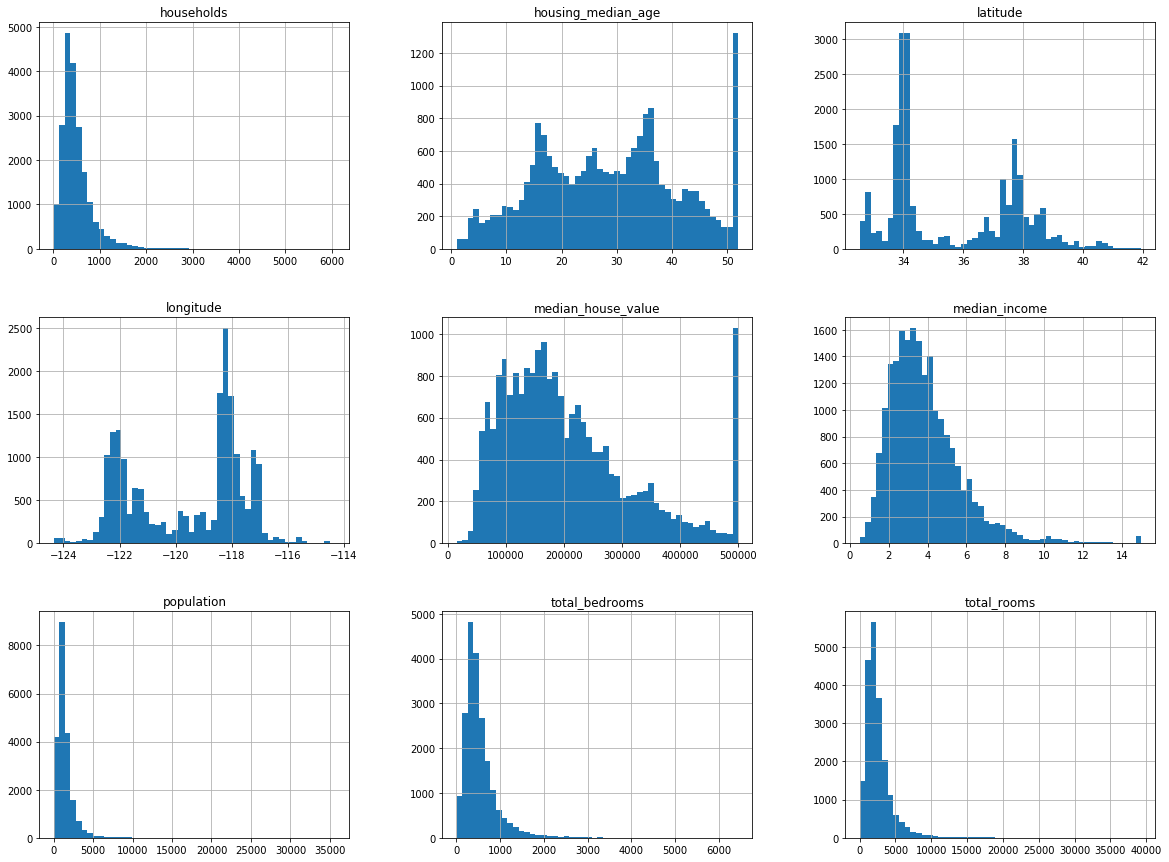

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
## split train - test sets
def split_train_test(data, test_ratio):
    shuffle_index = np.random.permutation(len(data))
    n_test = int(len(data) * test_ratio)
    _train = shuffle_index[n_test:]
    _test = shuffle_index[:n_test]
    train_sets = data.iloc[_train]
    test_sets = data.iloc[_test]
    print("# train sets : %i | # test sets : %i"%(len(train_sets), len(test_sets)))
    return train_sets, test_sets

In [9]:
train_sets, test_sets = split_train_test(housing, 0.2)

# train sets : 16512 | # test sets : 4128


In [10]:
## split train - test sets (retained from hash value
from zlib import crc32
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_sets = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    train_sets = data.loc[~in_test_sets]
    test_sets = data.loc[in_test_sets]
    print(" # train sets : %i | # test sets : %i"%(len(train_sets), len(test_sets)))
    return train_sets, test_sets

In [11]:
housing_with_id = housing.reset_index()
print(housing_with_id)

       index  longitude  latitude  housing_median_age  total_rooms  \
0          0    -122.23     37.88                41.0        880.0   
1          1    -122.22     37.86                21.0       7099.0   
2          2    -122.24     37.85                52.0       1467.0   
3          3    -122.25     37.85                52.0       1274.0   
4          4    -122.25     37.85                52.0       1627.0   
5          5    -122.25     37.85                52.0        919.0   
6          6    -122.25     37.84                52.0       2535.0   
7          7    -122.25     37.84                52.0       3104.0   
8          8    -122.26     37.84                42.0       2555.0   
9          9    -122.25     37.84                52.0       3549.0   
10        10    -122.26     37.85                52.0       2202.0   
11        11    -122.26     37.85                52.0       3503.0   
12        12    -122.26     37.85                52.0       2491.0   
13        13    -122

In [12]:
train_sets, test_sets = split_train_test_by_id(housing_with_id, 0.2, "index")

 # train sets : 16512 | # test sets : 4128


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
train_sets, test_sets = train_test_split(housing, test_size = 0.2, random_state = 42)

In [15]:
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)
housing['income_cat'].where(housing['median_income'] < 5, 5.0, inplace=True)
print(housing['income_cat'])

0        5.0
1        5.0
2        5.0
3        5.0
4        3.0
5        3.0
6        3.0
7        3.0
8        2.0
9        3.0
10       3.0
11       3.0
12       3.0
13       2.0
14       2.0
15       2.0
16       2.0
17       2.0
18       2.0
19       2.0
20       1.0
21       2.0
22       2.0
23       2.0
24       2.0
25       2.0
26       2.0
27       2.0
28       2.0
29       2.0
        ... 
20610    1.0
20611    1.0
20612    1.0
20613    1.0
20614    2.0
20615    2.0
20616    2.0
20617    3.0
20618    2.0
20619    2.0
20620    4.0
20621    2.0
20622    2.0
20623    2.0
20624    3.0
20625    3.0
20626    2.0
20627    2.0
20628    2.0
20629    2.0
20630    3.0
20631    3.0
20632    3.0
20633    2.0
20634    3.0
20635    2.0
20636    2.0
20637    2.0
20638    2.0
20639    2.0
Name: income_cat, Length: 20640, dtype: float64


In [16]:
## stratified sampling
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_sets = housing.loc[train_index]
    strat_test_sets = housing.loc[test_index]

In [17]:
housing['income_cat'].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
5.0    0.218459
4.0    0.072287
1.0    0.039826
Name: income_cat, dtype: float64

In [18]:
for set_ in (strat_train_sets , strat_test_sets):
    set_.drop("income_cat", axis = 1, inplace = True)

In [19]:
housing = strat_train_sets.copy()

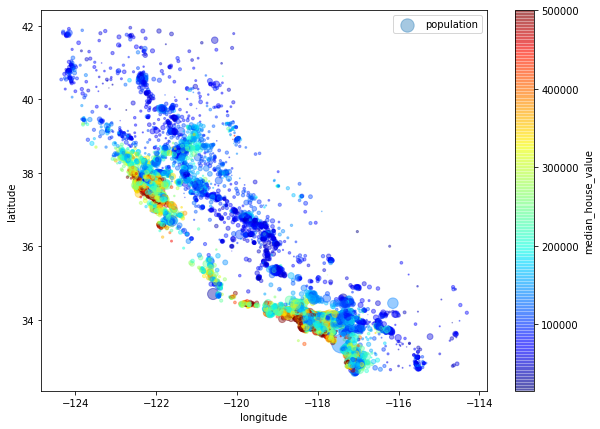

In [20]:
housing.plot(kind="scatter", x = "longitude", y = "latitude", alpha = 0.4,
            s = housing['population']/100, label = "population", figsize= (10,7),
            c = "median_house_value", cmap = plt.get_cmap("jet"), colorbar = True, sharex=False)

In [21]:
## standard correlation coefficient
corr_matric = housing.corr()

In [22]:
corr_matric['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687752
total_rooms           0.136422
housing_median_age    0.106985
households            0.066340
total_bedrooms        0.050081
population           -0.024622
longitude            -0.047586
latitude             -0.142814
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000008BC2A20>,
      dtype=object)

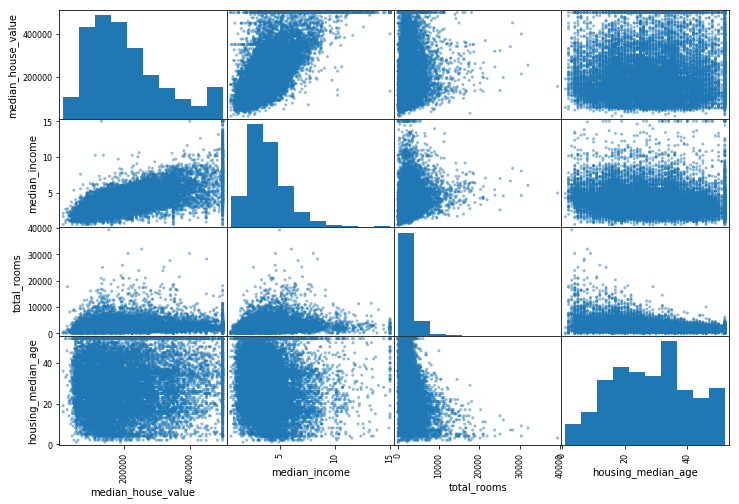

In [23]:
## scatter matrix
from pandas.plotting import scatter_matrix
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12,8))

In [24]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

In [25]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17172 to 11682
Data columns (total 13 columns):
longitude                   16512 non-null float64
latitude                    16512 non-null float64
housing_median_age          16512 non-null float64
total_rooms                 16512 non-null float64
total_bedrooms              16353 non-null float64
population                  16512 non-null float64
households                  16512 non-null float64
median_income               16512 non-null float64
median_house_value          16512 non-null float64
ocean_proximity             16512 non-null object
rooms_per_household         16512 non-null float64
bedrooms_per_room           16353 non-null float64
population_per_household    16512 non-null float64
dtypes: float64(12), object(1)
memory usage: 2.4+ MB


In [26]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687752
rooms_per_household         0.145300
total_rooms                 0.136422
housing_median_age          0.106985
households                  0.066340
total_bedrooms              0.050081
population_per_household   -0.022435
population                 -0.024622
longitude                  -0.047586
latitude                   -0.142814
bedrooms_per_room          -0.258861
Name: median_house_value, dtype: float64

In [27]:
## split data, label to training
housing = strat_train_sets.drop('median_house_value', axis=1)
housing_label = strat_train_sets['median_house_value'].copy()

In [28]:
## data null-value process method
def na_process(housing, method):
    if method == "dropna":
        # 1. drop the null-value from columu 
        housing.dropna(subset=["total_bedrooms"])
    elif method == "dropall":
        # 2. drop the all columu
        housing.drop('total_bedrooms', axis=1)
    elif method == "fillany-value":
        # 3. fill the specific-value (0, median, mean, .., etc.)
        median = housing['total_bedrooms'].median()
        housing['total_bedrooms'].fillna(median, inplace=True)
    else:
        print("etc..")
        
    return housing
        
        


In [29]:
## sklearn imputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
housing_num = housing.drop('ocean_proximity', axis=1)
imputer.fit(housing_num)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [31]:
imputer.statistics_

array([-118.52  ,   34.26  ,   29.    , 2120.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [33]:
X = imputer.transform(housing_num)

In [39]:
import pandas as pd
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index= list(housing.index.values))

In [40]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17172 to 11682
Data columns (total 8 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
dtypes: float64(8)
memory usage: 1.1 MB


In [41]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17172 to 11682
Data columns (total 9 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16353 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [43]:
## pandas factorize
housing_cat = housing['ocean_proximity']
housing_cat_encoded, housing_cate = housing_cat.factorize()

In [46]:
## one - hot coding
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(categories = 'auto')
housing_cat_OneHot = encoder.fit_transform(housing_cat_encoded.reshape(-1, 1))
housing_cat_OneHot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [49]:
cat_encoder = OneHotEncoder()
housing_cat_reshaped = housing_cat.values.reshape(-1, 1)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_reshaped)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [51]:
housing_cat2 = pd.get_dummies(housing)

In [54]:
housing_cat2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17172 to 11682
Data columns (total 13 columns):
longitude                     16512 non-null float64
latitude                      16512 non-null float64
housing_median_age            16512 non-null float64
total_rooms                   16512 non-null float64
total_bedrooms                16353 non-null float64
population                    16512 non-null float64
households                    16512 non-null float64
median_income                 16512 non-null float64
ocean_proximity_<1H OCEAN     16512 non-null uint8
ocean_proximity_INLAND        16512 non-null uint8
ocean_proximity_ISLAND        16512 non-null uint8
ocean_proximity_NEAR BAY      16512 non-null uint8
ocean_proximity_NEAR OCEAN    16512 non-null uint8
dtypes: float64(8), uint8(5)
memory usage: 1.2 MB


In [58]:
## make sklearn class
from sklearn.base import BaseEstimator, TransformerMixin
class CombineAttributeAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_rooms = True):
        self.rooms_idx, self.bedrooms_idx, self.population_idx, self.household_idx = 3, 4, 5, 6
        self.add_bedrooms_per_rooms = add_bedrooms_per_rooms
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, self.rooms_idx] / X[:, self.household_idx]
        population_per_household = X[:, self.population_idx] / X[:, self.household_idx]
        if self.add_bedrooms_per_rooms:
            bedrooms_per_room = X[:, self.bedrooms_idx] / X[:, self.rooms_idx]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombineAttributeAdder(False)
housing_extra_attribute = attr_adder.transform(housing.values)

In [83]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_name):
        self.attribute_name = attribute_name
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X[self.attribute_name].values

In [107]:
## make sklearn pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler # min-max, std normalizer
num_attribs = list(housing.columns.drop('ocean_proximity'))
cat_attribs = ['ocean_proximity']

num_pipe = Pipeline([
    ('selecter', DataFrameSelector(num_attribs)),
    ('impute', SimpleImputer(strategy='median')),
    ('attribs_adder', CombineAttributeAdder()),
    ('std_scaler', StandardScaler()),
    ])

cat_pipe = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('cat_encoder', OneHotEncoder(sparse = False)),
])

## pipe chainning
from sklearn.pipeline import FeatureUnion
full_pipe = FeatureUnion(transformer_list = [
    ('num', num_pipe),
    ('cat', cat_pipe),
])




In [108]:
housing_prepared = full_pipe.fit_transform(housing)

In [111]:
def arr_to_pandas(arr):
    df = pd.DataFrame(arr)
    return df

In [112]:
arr_to_pandas(housing_prepared)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.340614,0.815497,-0.049112,-0.709438,-0.896505,-0.899593,-0.907204,2.103965,0.663187,-0.034229,-1.045773,0.0,0.0,0.0,0.0,1.0
1,0.571679,-0.733250,0.747486,0.290733,0.292518,-0.152934,0.250288,2.038004,0.017837,-0.085314,-0.191296,1.0,0.0,0.0,0.0,0.0
2,1.225753,-1.327482,0.030548,0.110069,-0.002321,-0.027003,0.063085,-0.000549,0.018751,-0.036686,-0.436967,0.0,0.0,0.0,0.0,1.0
3,1.255711,-0.358930,-1.164350,0.335899,0.203099,0.298098,0.155368,-0.144597,0.220839,0.005735,-0.463216,0.0,1.0,0.0,0.0,0.0
4,-1.390543,0.909077,0.667826,0.325190,0.481021,0.040876,0.511317,0.119034,-0.242364,-0.084286,0.113939,0.0,0.0,0.0,0.0,1.0
5,0.881241,-0.882978,-0.288091,-0.121814,-0.154574,-0.201163,-0.105661,-0.089551,-0.104523,-0.041324,-0.233614,1.0,0.0,0.0,0.0,0.0
6,-1.290684,0.852929,0.269527,0.016943,0.304601,-0.017178,0.619420,0.207614,-0.692521,-0.102386,0.555903,0.0,0.0,0.0,1.0,0.0
7,-1.160868,0.848250,-0.845710,1.058555,0.674358,1.394865,0.685336,1.447154,0.395083,0.074181,-0.765172,1.0,0.0,0.0,0.0,0.0
8,1.565273,-0.691139,-0.766050,-0.353697,-0.420413,-0.593249,-0.466883,-0.516739,0.146099,-0.063337,-0.326885,0.0,1.0,0.0,0.0,0.0
9,0.591651,-0.691139,1.384765,-0.486401,-0.618583,-0.731684,-0.567076,0.655892,0.059250,-0.083470,-0.600442,1.0,0.0,0.0,0.0,0.0


In [120]:
housing_labels = housing_label.values
housing_labels[:2]

array([500001., 500001.])

In [121]:
housing_prepared[:2]

array([[-1.34061366,  0.81549736, -0.04911198, -0.70943775, -0.8965049 ,
        -0.89959322, -0.90720414,  2.10396498,  0.66318706, -0.03422926,
        -1.04577332,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.57167919, -0.73324997,  0.7474863 ,  0.2907333 ,  0.29251764,
        -0.15293427,  0.25028783,  2.03800448,  0.01783652, -0.08531427,
        -0.19129614,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ]])

In [123]:
## linear model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [125]:
some_data = housing.iloc[:5]
some_labels = housing_labels[:5]
some_data_prepared = full_pipe.transform(some_data)
print(" pred : ", lin_reg.predict(some_data_prepared))

 pred :  [396659.12817359 411472.23082704 228454.13525514  96705.71641328
 289523.91500568]


In [129]:
## mean_square_error
from sklearn.metrics import mean_squared_error
housing_pred = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_pred)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

68501.96465501045


In [131]:
## decision tree regression
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)
dtr_predict = tree_reg.predict(housing_prepared)
tree_rmse = np.sqrt(mean_squared_error(housing_labels, dtr_predict))
print(tree_rmse)

0.0


In [132]:
## k-fold cross-validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring = 'neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [135]:
def print_scores(score):
    print("Scores : ", score)
    print("Mean : ", score.mean())
    print("Std deviation : ", score.std())

In [137]:
print_scores(tree_rmse_scores)

Scores :  [72503.75954798 71985.89659197 72112.01026285 69872.1047657
 72969.81914576 74463.63320401 70062.87823031 71147.62640953
 73406.6440469  72882.06009958]
Mean :  72140.6432304598
Std deviation :  1372.6743442757781


In [138]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                            scoring = 'neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
print_scores(lin_rmse_scores)

Scores :  [66430.84467076 64703.73637141 66823.35880931 72590.89598896
 68485.97604484 72106.95906606 67827.46593209 68914.80048773
 70366.48421294 70183.29232284]
Mean :  68843.38139069466
Std deviation :  2387.7273179383965


In [143]:
## random forest
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                               scoring = 'neg_mean_squared_error', cv=10)
forest_rmse = np.sqrt(-forest_scores)
print_scores(forest_rmse)


c:\program files (x86)\microsoft visual studio\shared\python36_64\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Scores :  [52400.26479038 50070.09459668 52893.80618672 55144.35918866
 54350.44293729 56486.56828946 53116.44148881 50543.03800973
 55549.8294057  55542.00293292]
Mean :  53609.6847826347
Std deviation :  2069.538847745085
